In [1]:
from utils.mch import MCHHandler
from utils import load_mch
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob

%matplotlib inline 

In [2]:
# glob("output/phantom/mcx_output/")

mch = MCHHandler()

In [3]:
mch.load_config("configs/phantom.json")
s = mch.run_wmc()

In [4]:
ss = s[0][0]

In [5]:
ss.shape

(3, 80)

In [6]:
d, h, _ = load_mch("output/phantom/mcx_output/phantom_820_C.mch")
h

{'version': 1,
 'maxmedia': 1,
 'detnum': 3,
 'colcount': 10,
 'total_photon': 2000000000,
 'detected': 221638,
 'saved_photon': 221638,
 'unitmm': 0.25,
 'seed_byte': 0,
 'normalize': 1.600000023841858,
 'respin': 1}

In [17]:
d.head(3)

,detector_idx,scattering,media_0,x,y,z,dx,dy,dz
0,1.0,314.0,158.697586,90.156967,71.579453,-0.000061,0.164985,0.364526,-0.916461
1,3.0,498.0,215.909027,119.611488,73.595078,-0.000061,0.160629,0.322140,-0.932965
2,1.0,540.0,241.064331,90.634544,70.760223,-0.000061,0.262827,0.420560,-0.868361


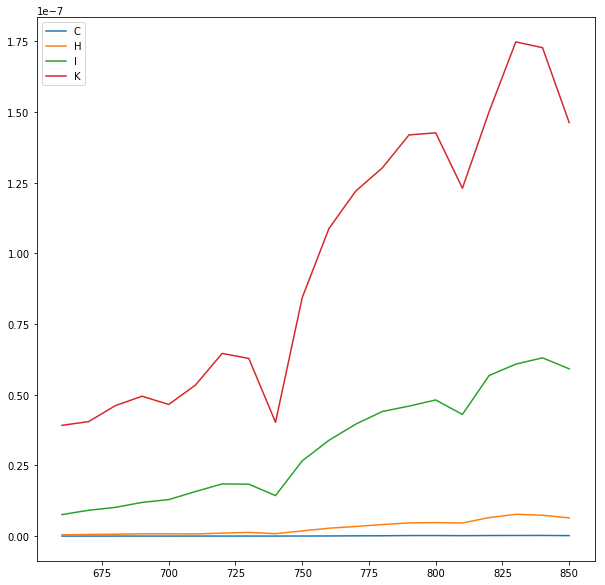

In [8]:
plt.figure(figsize=(10, 10))
plt.plot([i for i in range(660, 851, 10)],ss[0][::4], label="C")
plt.plot([i for i in range(660, 851, 10)],ss[0][1::4], label="H")
plt.plot([i for i in range(660, 851, 10)],ss[0][2::4], label="I")
plt.plot([i for i in range(660, 851, 10)],ss[0][3::4], label="K")
# plt.plot(ss[0][4::6], label="E")
# plt.plot(ss[0][5::6], label="N")

plt.legend()
plt.show()

In [45]:
df = pd.DataFrame({
    "wl": [i for i in range(660, 851, 10)],
    "c": ss[0][::4],
    "h": ss[0][1::4],
    "i": ss[0][2::4],
    "k": ss[0][3::4]
})

In [46]:
df.to_csv("CHIKEN/20190621_sim_chik.csv", index=None)